In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn import metrics
import scipy as sp
from scipy.spatial import distance_matrix

from diffusion_functions import *
from semi_supervised_manifold_learning import *
from animate_diffusion import animate_diffusion

# commands for displaying animations in jupyter notebook
from IPython.display import HTML

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Concentric rectangles in increasing dimensions

## Helper functions

In [7]:
def format_axes(ax, titlestring):
    # figure formatting
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.axis('off')
    if not titlestring==None:
        ax.set_title(titlestring)
    return

def plot_label_comparison_colorful(ax, label_vector, data_matrix, titlestring=None):
    threshold = 0 
    label_estimates = label_vector#make_sweep_cut(label_vector, threshold)

    im = ax.scatter(data_matrix[:,0],data_matrix[:,1],c=label_estimates)
    plt.colorbar(im, ax=ax)
    
    format_axes(ax,titlestring)
    return

def plot_label_comparison_binary(ax, label_vector, data_matrix, titlestring=None, 
                                 objective_function = sweep_cut_classification_error):
    
    cut_val, threshold = find_min_sweepcut(label_vector,100,objective_function, orthogonality_constraint = 'auto')
    label_estimates = make_sweep_cut(label_vector, threshold)
    
    classification_error = sweep_cut_classification_error(label_estimates)
    orthogonality_error = np.abs(np.sum(label_estimates)/len(label_estimates))

    im = ax.scatter(data_matrix[:,0],data_matrix[:,1],c=label_estimates)
    #plt.colorbar(im, ax=ax)
    
    subtitle = f'\n Threshold = {threshold:.3f}. Cut objective = {cut_val:.3f} \n Class. error = {classification_error:.3f} \n Orthog. error = {orthogonality_error:.3f}'
    format_axes(ax,titlestring+subtitle)
    return

def plot_AUC_hist(AUC_vals, titlestring = None):
    plt.rcParams.update({'font.size': 15})
    # get bin parameters for consistent scaling of both datasets without displaying
    _, first_bins, _ = plt.hist([[v[1] for v in AUC_vals], [v[0] for v in AUC_vals]])
    plt.clf()
    
    fig, ax = plt.subplots(figsize = (6, 5))
    ax.hist([v[1] for v in AUC_vals], bins = first_bins, alpha=0.5, edgecolor = 'black', label = 'graph')
    ax.hist([v[0] for v in AUC_vals], bins = first_bins, alpha=0.5, edgecolor = 'black', label='hypergraph')
#     ax.hist([v[1] for v in AUC_vals], alpha=0.5, edgecolor = 'black', label = 'graph')
#     ax.hist([v[0] for v in AUC_vals], alpha=0.5, edgecolor = 'black', label='hypergraph')
    ax.legend()
    
    # figure formatting 
    ax.set_title(titlestring)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    plt.show()
    return

def compare_ROC_curves(hypergraph_x, graph_x):
    n = len(hypergraph_x)
    labels = np.hstack([np.full(shape=int(n/2),fill_value = -1),np.full(shape=int(n/2),fill_value = 1)])
    
    plt.plot(figsize=(15, 15))
    for x, legend_val in [(graph_x, 'graph'),(hypergraph_x, 'hypergraph')]:
        fpr, tpr, thresholds = metrics.roc_curve(labels, x, pos_label=1)
        plt.plot(fpr, tpr, label = legend_val)
    
    graph_auc_score = metrics.roc_auc_score(labels, graph_x)
    hypergraph_auc_score = metrics.roc_auc_score(labels, hypergraph_x)
    
    plt.legend()
    plt.title('ROC curves \n hyper AUC score = '+str(hypergraph_auc_score)+' \n graph AUC score = '+str(graph_auc_score))
    plt.show()
    return

## Visualization in 2D

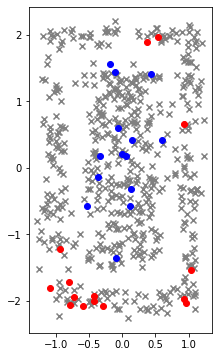

In [40]:
# generate new data
inner_sidelengths=[1, 3, 1, 1, 1, 1, 1, 1]
outer_sidelengths=[2, 4, 2, 2, 2, 2, 2, 2]
_, data_matrix = generate_concentric_highdim_rectangles(inner_sidelengths = inner_sidelengths[:2],
                                                        outer_sidelengths = outer_sidelengths[:2],
                                                        verbose = False)
n = data_matrix.shape[0]

num_rand_seeds = int(0.05*n)
x0 = np.full(shape=(n, 1), fill_value=0)
random_seeds = np.random.choice(np.arange(n), size=num_rand_seeds)
x0[random_seeds[random_seeds < n / 2]] = -1
x0[random_seeds[random_seeds > n / 2]] = 1

fig, ax = plt.subplots(figsize = (6,6))
# formatting
unlabeled_idxs = (x0==0).reshape(n,)
plt.scatter(data_matrix[unlabeled_idxs,0], data_matrix[unlabeled_idxs,1],marker="x",c='grey')
pos_idxs = (x0==1).reshape(n,)
plt.scatter(data_matrix[pos_idxs,0], data_matrix[pos_idxs,1],marker="o",c='red')
neg_idxs = (x0==-1).reshape(n,)
plt.scatter(data_matrix[neg_idxs,0], data_matrix[neg_idxs,1],marker="o",c='blue')
ax.set_aspect('equal')
plt.show()

## AUC Histograms for varying dimension

Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer


<Figure size 432x288 with 0 Axes>

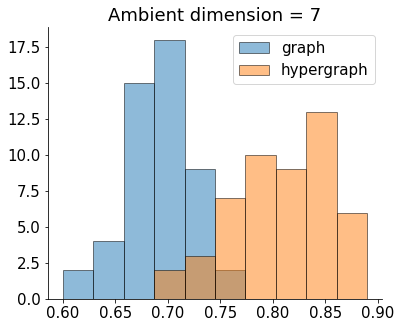

In [5]:
pts_per_community = 300
n = 2*pts_per_community
labels = np.hstack([np.full(shape=int(n/2),fill_value = -1),np.full(shape=int(n/2),fill_value = 1)])


node_weight_method = 'gaussian_to_central_neighbor'
order = 2
inner_sidelengths=[1, 3, 1, 1, 1, 1, 1, 1]
outer_sidelengths=[2, 4, 2, 2, 2, 2, 2, 2]

# experimental procedure parameters
k = 5
num_trials = 50
PPR_iterations = 50

for ambient_dim in [7]:
    dimension_dependent_data_generation = lambda verbose: generate_concentric_highdim_rectangles(verbose = False,
                                                        inner_sidelengths = inner_sidelengths[:ambient_dim],
                                                        outer_sidelengths = outer_sidelengths[:ambient_dim])
    AUC_vals = []
    for trial in range(num_trials):
        graph_x, hypergraph_x, _ = compare_estimated_labels('PPR',
                                    generate_data = dimension_dependent_data_generation,
                                    k = 5,
                                    num_iterations = PPR_iterations,
                                    diffusion_step_size=None,
                                    titlestring=None,
                                    node_weight_method=node_weight_method,
                                    order = order
                                    )

        graph_auc_score = metrics.roc_auc_score(labels, graph_x)
        hypergraph_auc_score = metrics.roc_auc_score(labels, hypergraph_x)
            
        AUC_vals.append((hypergraph_auc_score, graph_auc_score))
    plot_AUC_hist(AUC_vals,titlestring = f'Ambient dimension = {ambient_dim}') 

Sorry for the delay. Here's a comprehensive look at how the classification performance varries with different node weights (unweighted, Gaussian L2, Gaussian L1), different distributions (square vs asymmetric boxes), and dimension. All histograms are over 50 independent trials.

We compare to the graph PPR vector for the corresponding Gaussian-weighted graph Laplacian.

Scales are not consistent across all the histograms, so I advise zooming in to see. I think there are a couple of takeaways:
1. Gaussian kernels do seem to increase separation between graph and hypergraph in higher dimensions, compared to unweighted.
2. Both graph and hypergraph perform better on the square boxes than the rectangular.
3. In high dimensions (dim 7), the Gaussian kernels seem to improve performance of both methods, compared to unweighted. It's difficult to say whether the Gaussian L1 or Gaussian L2 has a stronger effect--both appear comparable. Gaussian L1 seems to really shine in both data distributions, but it's difficult for me to come up with an intuitive reason. It could just be a statistical fluke.
